### ロジスティック回帰の実装

コスト関数を以下に書き換えるだけ。<br>

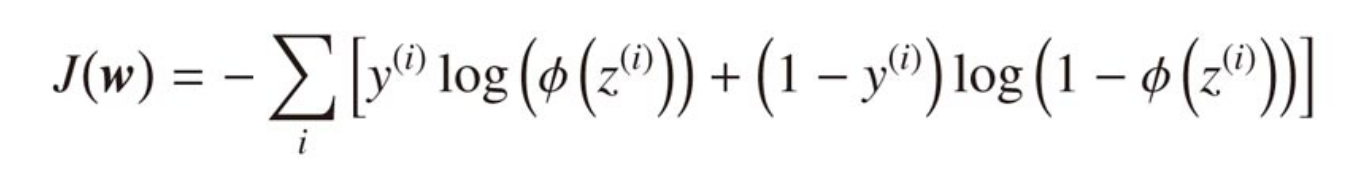

In [2]:
# 画像の表示
from IPython.display import Image
Image(filename='10.png', width=500)

Adalineとの違い<br>
<ol>
    <li>トレーニングサンプルを全て分類するコストがエポックごとに計算。</li>
    <li>線形活性化関数をシグモイド関数に置き換え</li>
    <li>閾値関数を書き換えて、-1と1の代わりにクラスラベル0と1を返すようにする。</li>
</ol>

In [5]:
class LogisticRegressionGD(object):
    """勾配降下法に基づくロジスティック回帰分類器
    パラメータ
    -------------
    eta : float
        学習率（0.0より大きく1.0以下の値）
    n_iter : int
        トレーニングデータのトレーニング個数
    random_state : int
        重みを初期化するための乱数シード
        
    属性
    -------------
    w_ : 一次元配列
        適合後の重み
    cost_ : リスト
        各エポックでの誤差平方和コスト関数
    """
    
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        # 学習率の初期化
        self.eta = eta
        # トレーニング回数の初期化
        self.n_iter = n_iter
        # 乱数シードを固定するrandom_state
        self.random_state = random_state
        
    def fit(self, X, y):
        """トレーニングデータに適合させる
        
        パラメータ
        -------------
        X : {配列のような構造}, shape = [n_samples, n_features]
            トレーニングデータ
            n_samplesはサンプルの個数, n_featuresは特徴量の個数
        y : 配列のようなデータ構造, shape = [n_samples]
            目的変数
        
        戻り値
        -------------
        self : object
        """
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.cost_ = list()
        
        # トレーニング回数分トレーニングデータを反復処理
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            # 誤差平方和のコストでなく、ロジスティック回帰のコストを計算
            cost = -y.dot(np.log(output)) - ((1-y).dot(np.log(1-output)))
            # エポックごとのコストを格納
            self.cost_.append(cost)
            
        return self
    
    def net_input(self, X):
        """総入力を計算"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, z):
        """ロジスティックシグモイド活性化関数を計算"""
        return 1. / (1. + np.exp(-np.clip(z, 250, -250)))
    
    def predict(self, X):
        """1ステップ後のクラスラベルを返す"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)